
  <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    <meta http-equiv="Content-Style-Type" content="text/css" />
    <meta name="generator" content="pandoc" />
    <title></title>
    <style type="text/css">code{white-space: pre;}</style>
  </head>
  



<h1> AMI </h1> 
<h1> Aprendizaje Supervisado: Regresores Multivariantes </h1>

<br>
    
En esta práctica continuaremos el estudio de los regresores. Como se ha indicado los regresores son utilizados en el contexto del aprendizaje máquina para predecir el valor de variables de salida continuas y es de tipo supervisado ya que debemos contar con el valor de salida asociado a cada conjunto de entradas. Tras estudiar sistemas univariantes (una sola <em>feature</em>), pasaremos a considerar el caso mucho más frecuente en el que disponemos de n variables de entrada o features y procederemos como en el caso anterior: 

<ol>
    <li> Partiremos de una dataset dado por una matriz <font size="+1"><span class="math inline">$X_{m\times n}$</span></font> (siendo m el número de registros y n el numero de variables) y por un vector columna <font size="+1"><span class="math inline">$y_{m\times 1}$</span></font> que contendrá el valor observado de salida para el registro m.
    <li> Plantearemos una función de hipótesis <font size="+1"><span class="math inline">$h_{\theta}(x)$</span></font> que prediga el valor de salida para un vector fila de entradas <font size="+1"><span class="math inline">$x_{1\times n}$</span></font>
    <li> Crearemos una función de coste que dependerá del vector de parámetros del modelo, <font size="+1"><span class="math inline">$\theta$</span></font>
    <li> Mediante un mecanismo de optimización como el descenso del gradiente, buscaremos la parametrización óptima
</ol>

<h2> Regresores polinómicos </h2>

Empezaremos con el caso más sencillo, extendiendo explicitamente un caso con una sóla variable independiente a un sistema multivariante. Como en la sesión anterior, crearemos un dataset de ejemplo:

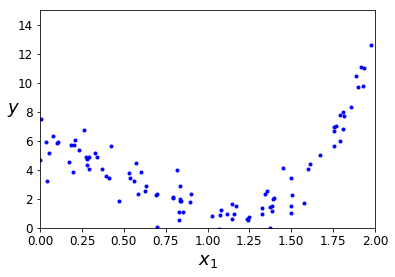

In [72]:
# Librerias
import numpy as np
import os

# Para generar figuras
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Establecemos la semilla para generar siempre los mismos resultados
np.random.seed(1)

# Generamos dataset para pruebas
X = 2 * np.random.rand(100, 1)
y = 5 + 7 * np.power(X,3) - 13 * np.square(X) + 2 * X + np.random.randn(100, 1)

# Mostramos el dataset
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


Como primera tarea vamos a realizar un ajuste lineal con término independiente, como en la semana anterior. Para ello recuerde que debe añadir una columna de 1's a la matriz X a fin de convertir el problema a notación matricial: 

Es decir, la función de hipótesis:

<p><font size="+1"><span class="math inline">$h_{\theta} (x) = \theta_0 + \theta_1 x$</span></font></p>

es equivalente a:

<p><font size="+1"><span class="math inline">$x_b' \theta$</span></font></p>

siendo
<font size="+0.5"><span class="math inline">$x_b =  \begin{pmatrix}
1 \\
x
\end{pmatrix}$</span></font>
y
<font size="+0.5"><span class="math inline">$\theta =  \begin{pmatrix}
\theta_0 \\
\theta_1
\end{pmatrix}$</span></font>

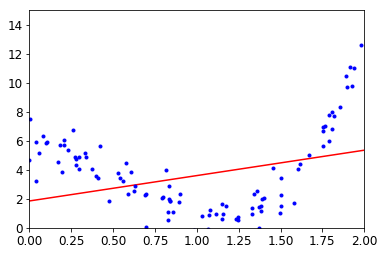

In [245]:
def gradient(X,y,theta):
    m = X.shape[0]
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    return gradients

def gradientdescend(X,y): 
    alpha = 0.1
    n_iterations = 100
    theta = np.random.randn(X.shape[1],1) # Punto inicial se escoge al azar
    
    # Iteramos minimizando la funcion    
    for iteration in range(n_iterations):
        gradients = gradient(X,y,theta)
        theta = theta - alpha * gradients
    return theta
        
# Calculamos el ajuste
X_b =  # Completar: añadir bias (x0 = 1) a cada instancia
theta_best = gradientdescend(X_b, y)

# Calculamos la predicción y lo mostramos
X_new = np.array([[0], [2]])
X_new_b = # Completar: añadir bias (x0 = 1) a cada instancia
y_predict = # Completar: calcular la predicción

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Como verá el ajuste es bastante pobre. Una forma de solucionarlo es intentando un ajuste a funciones polínomicas. En este caso, la hipótesis será:

<br>
<p><font size="+1"><span class="math inline">$h_{\theta} (x) = \sum_{p=1}^P \theta_p x^p$</span></font></p>

<h4>Cuestión: Reescriba la ecuación anterior de modo matricial y adapte el código anterior para obtener el mejor ajuste para un polinomio de grado p</h4>

[[1.00000000e+00 1.44064899e+00 2.07546950e+00 2.99002304e+00]
 [1.00000000e+00 2.28749635e-04 5.23263954e-08 1.19696438e-11]
 [1.00000000e+00 6.04665145e-01 3.65619938e-01 2.21077633e-01]]


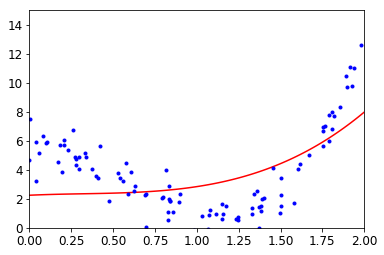

In [246]:
grados = 3

def convierte(X,p):
    # Completar: calcule una matrix adecuada al problema polinomico de grado p
        
    return X_pol
    
X_pol = convierte(X,grados)
print(X_pol[1:4,:])
theta_best = gradientdescend(X_pol, y)
# print(theta_best)

# Calculamos la predicción y lo mostramos
X_new = np.linspace(0.0, 2.0, num=100).reshape(100,1)
y_predict = # Completar: calcular la prediccion

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Pruebe distintos parámetros del modelo: grado del polinómio (p), factor de aprendizaje (α) y número de iteraciones hasta conseguir un ajuste adecuado. ¿Qué problemas encuentra en el ajuste? ¿A qué son debidos?

<h4>Cuestión: Reescriba la función anterior de modo que las columnas de la función X estén normalizadas. Es decir, que tengan media cero y desviación típica 1.</h4>

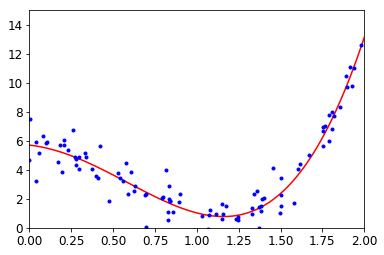

In [268]:
grados = 5

def gradient(X,y,theta):
    m = X.shape[0]
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    return gradients

def gradientdescend(X,y): 
    alpha = 0.01
    n_iterations = 100
    theta = np.random.randn(X.shape[1],1) # Punto inicial se escoge al azar
    
    # Iteramos minimizando la funcion    
    for iteration in range(n_iterations):
        gradients = gradient(X,y,theta)
        theta = theta - alpha * gradients
    return theta

def convierteyescala(X,p,escala=0,mu=np.zeros([1,1]),sigma=np.zeros([1,1])):
          
    if not escala:    
        # Completar: normalizar la matriz columna a columna, menos la primera. La normalización se 
        # realiza restando la media y dividiendo por la desviación tipica
        return X_pol, mu, sigma
    else:
        # Completar: normalizar la matriz columna a columna, usando para la normalización  
        # las mus y sigmas recibidas como argumento
        return X_pol
        
 

X_pol, mu, sigma = convierteyescala(X,grados)
theta_best = gradientdescend(X_pol, y)
#print(theta_best)

# Calculamos la predicción y lo mostramos
X_new = np.linspace(0.0, 2.0, num=100).reshape(100,1)
y_predict = convierteyescala(X_new,grados,escala=1,mu=mu,sigma=sigma).dot(theta_best) # Prediccion para los puntos x=0.0 y x=2.0

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h3> Regresión polinómica usando la librería scikit-learn </h3>

A continuación mostraremos el uso de las librerías scikit-learn de Python para poder abordar directamente la regresión polinómica. Crearemos un interpolador de tipo lineal tras expandir la matriz X, realizaremos el escalado y posteriormente ajustaremos con un regresor lineal. Como puede comprobar todo el proceso anterior se simplifica enormemente. 

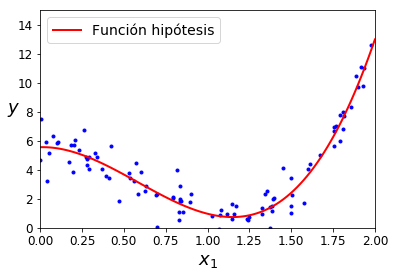

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=3, include_bias=True) # Configuramos el modelo
std_scaler = StandardScaler()
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

polynomial_regression.fit(X, y)

# Mostramos el resultado
y_new = polynomial_regression.predict(X_new)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Función hipótesis")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Pruebe subir el grado del polinomio a un número elevado. El efecto que observa se denomina sobre-ajuste <em>overfitting</em> y se puede explicar como un intento del optmizador por ajustarse demasiado bien a las observaciones. La consecuencia es que un algoritmo que tenga overfitting no generalizará correctamente. Para evitar dicho problema debemos recurrir a técnicas de regularización, las cuales se basan en forzar valores pequeños para los parámetros. Los veremos en la próxima sesión.

<h3>Regresores multivariantes</h3>

Todas las técnicas mostradas en la sección anterior pueden ser aplicadas directamente a un problema multivariante, donde la matriz <font size="+1"><span class="math inline">$X_{m\times n}$</span></font> esté ya construida. Como ejercicio debe aplicar el método anterior al problema siguiente, tanto para el caso directo, como formando versiones polinóminas de <font size="+1"><span class="math inline">$X$</span></font>.

In [290]:
# Generamos dataset para pruebas
X = np.c_[2 * np.random.rand(100, 1), 10 - 5*np.random.rand(100,1), 8*np.sin(np.random.rand(100,1)*2*np.pi*3)]
y = 5 + 7 * np.power(X[:,1],3) - 13 * np.square(X[:,2].dot(X[:,0])) + 2 * X[:,0] + np.random.randn(100, 1)

print(X,y)

# FALTA: Debe crear un predictor adecuado a estos datos

[[ 0.80749145  6.6505056  -1.28661205]
 [ 1.76659057  8.08589513 -7.12222984]
 [ 1.31395574  7.52584087 -3.04654164]
 [ 0.16300196  5.24722275 -6.41361401]
 [ 0.26901192  5.26026819 -5.03482656]
 [ 0.01536392  7.575084    4.44691288]
 [ 1.96438117  6.43783009  1.57051011]
 [ 0.09534815  6.25084963 -2.93204992]
 [ 0.21075627  7.44700858 -1.39137885]
 [ 0.91493085  7.7649374  -7.95370606]
 [ 0.10880102  6.15489297  2.24596155]
 [ 0.57817199  7.92186423  5.18466373]
 [ 1.35594808  7.49955691 -0.27385059]
 [ 0.09725813  9.5626023   7.98553227]
 [ 0.91594427  5.47832102  2.56947632]
 [ 1.14551612  7.72636102 -5.46802016]
 [ 0.39853337  7.00472408 -2.49472743]
 [ 0.37233708  9.64722071 -6.82866557]
 [ 0.2053753   7.35279843 -7.90927515]
 [ 0.13760052  8.8934398  -7.99458313]
 [ 0.3379698   8.07405175  4.6810225 ]
 [ 0.12163307  7.20001132  7.52533569]
 [ 1.10335724  5.92483442 -7.20054769]
 [ 1.61581084  8.68578991  7.41543789]
 [ 1.60868319  6.36092301  7.90385817]
 [ 1.26236346  7.53978443

<hr>
<h1> Funciones útiles de Python para el desarrollo de la práctica </h1>

<ul>
<li> Multiplicacion matrices A y B con numpy: A.dot(B)
<li> Traspuesta de matriz A con numpy: A.T
<li> Inversión de matriz A con numpy: np.linalg.inv(A)
<li> Matriz A por vector 𝜃 con numpy: A.dot(theta)
<li> Medida de tiempo de una orden con ipython: %timeit ...
<li> Medida de tiempo de un bloque con python: <br>
    start_time = timeit.default_timer()<br>
    ...<br>
    elapsed = timeit.default_timer() - start_time
<li> Concatenación de vector columna: np.c_[a,b]
<li> Asignación condicional: x = 5 if a==0 else 3
<li> Bucle for de 0 a n-1: for i in range(0,n):
<li> Bucle for de 0 a 1 con 5 pasos: for i in linspace(0.0,1.0,num=5):
<li> Cálculo de la media: np.mean() 
<li> Cálculo de la desviación tipica: np.std()   
</ul>